# 3. Bayes Theorem

앞서서 머신러닝은 어떠한 데이터가 주어졌을 때 그 데이터를 가장 잘 설명할 수 있는 모델에 대한 파라미터를 찾아가는 과정이라고 하였다.<br/>
이러한 파라미터를 추정하는 방법에는 MLE, MAP 두가지가 있다.

### MLE(Maximum Likelihood Estimation)
: 관측된 데이터의 등장 확률을 최대화시키는 파라미터를 추정하는 방법 <br/><br/>
$$ \hat{\theta} = argmax_{\theta}P(D|\theta)  $$<br/>

ex) 동전이 앞으로 떨어지는지 뒤로 떨어지는지 확률을 추정하고자 한다.<br/><br/>
MLE 방법에서는 동전을 몇 번 던저 본 다음에 나온 확률로써 추정한다<br/>
5번 Head : 2 => 2/5 <br/>
    Tail : 3 => 3/5 <br/><br/>
동전 던지기가 binomial distribution(이산확률분포)를 따른다고 가정했을 때, 앞면이 나올 확률을 $ \theta $ 라 한다면<br/><br/>
$$ P(D | \theta ) = \theta^{a_H}(1-\theta)^{a_T} $$<br/>
$ \theta $의 best candidate은 관측된 데이터의 등장 확률을 최대화하는 $\theta$ 이다.<br/><br/>
- MLE calculation<br/><br/>
$ \hat{\theta} = argmax_{\theta}P(D|\theta) = argmax_{\theta} \theta^{a_H}(1-\theta)^{a_T} $ <br/>
$ = argmax_{\theta} lnP(D|\theta) = argmax_{\theta}{a_Hln\theta + a_Tln(1-\theta)} $ => 미분해서 극점 찾기<br/><br/>
$ \frac{\theta}{d\theta}(a_Hln\theta + a_Tln(1-\theta)) $<br/><br/>
$ \frac{a_H}{\theta}-\frac{a_T}{1-\theta}=0 $<br/><br/>
$ \theta = \frac{a_H}{a_T+a_H} $    => MLE관점에서 본 $\theta$의 best candidate
<br/><br/>
- number of trials(N)이 클수록 estimate error가 감소한다

### MAP(Maximum a priori Probability )
: 관측된 데이터 뿐만 아니라 사전 지식을 이용해서 파라미터를 추정하는 방법<br/>
$$ P(\theta | D)=\frac{P(D|\theta)P(\theta)}{P(D)} $$<br/>
$$ posterial = \frac{likelihood * prior\, knowledge}{Normalizing constatnt} $$<br/>
ex) 동전 던지기<br/>
데이터는 위와 같지 나왔지만 사실 50 : 50의 확률일 것 같아(prior knowledge)<br/>
p($\theta$)는 beta distribution(베타 분포)를 따른 다고 가정한다.<br/><br/>
$$ p(\theta)=\frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha,\beta)},\, B(\alpha,\beta)=\frac{\Gamma (\alpha)\Gamma (\beta)}{\Gamma (\alpha+\beta)}\, , \Gamma (\alpha)=(\alpha-1)! $$<br/>
$$ P(\theta|D)\propto P(D|\theta)P(\theta) \propto \theta^{a_H+\alpha-1}(1-\theta)^{a_T+\beta-1} $$<br/><br/>
- 하지만 MAP를 이용한 파라미터 추정은 $\alpha$, $\beta$의 정의에 따라 달라질 수 있다.<br/>
그런데 실험을 많이 할수록(number of trial이 늘어날수록) $\alpha$, $\beta$의 영향은 작아지고, $a_H$, $a_T$의 영향이 커진다.<br/>
따라서 결국 MLE와 MAP의 추정된 parameter은 같아질 것이다.

### Bayes Theorem
$$ P(h|D)=\frac{P(D|h)P(h)}{P(D)} $$<br/>
$$ P(h) = prior\,probability\,of\,hypothesis\,h $$<br/>
$$ P(D) = prior\,probability\,of\,training\,data\,D $$<br/>
$$ P(h|D) = posterior\,probability\,of\,hypothesis\,h $$<br/>
$$ P(D|h) = likelihood\,of\,D\,given\,h $$<br/>
ex) 예를 들어, 매우 불공정한 카지노에서 두가지 종류의 주사위가 있다고 가정해보자<br/>
    99%의 주사위는 일반적인 주사위고($D_{fair}$), 1%는 조작된 주사위($D_{loaded}$)이다.<br/>
    조작된 주사위는 6이 50%의 확률로 나온다. 테이블에서 주사위를 랜덤하게 골라서 던진다고 했을 때,<br/><br/>
    $ P(six|D_{loaded}) = 0.5 $              
    $ P(six|D_{fair}) = 1/6 $<br/>
    $ P(six,D_{loaded}) = 0.5*0.01 = 0.005 $<br/>
    $ P(six,D_{loaded}) = 0.99 * 1/6 $<br/>
    $$ P(D_{loaded}|six) = \frac{P(six|D_{loaded})P(D_{loaded})}{P(six)}=0.2143 $$
<br/><br/>
- Chosing hypothesis 
   $$ h_{MAP} = argmax P(h|D) $$ <br/>
   $$ = argmax \frac{P(D|h)P(h)}{P(D)} $$<br/> 
   $$ = argmax P(D|h)p(h)   $$
 

### Minimun Description Length
- 앞서서 모델을 선택할 때 간단한 모델일수록 더 선호한다는 occam's razor이라는 이론이 있었다. <br/>
- **Occams razor** : prefer the shortest hypothesis
- **MDL(Minimum Description Length)**은 가설(model)이 얼마나 좋은지를 판단하는 지표 중 하나이다.<br/><br/>
  $$ h_{MDL} = argminL_{C_1}(h) + L_{C_2}(D|h) $$<br/>
  이때 , $L_C(x)$는 C라는 encoding에서 x의 description length를 의미한다.
  위의 수식에서 첫번째 $L_{C_1}(h)$은 가설 h를 나타내는데 얼마나 많은 비트가 필요한지, 즉 얼마나 모델이 단순한지(occam's razor)를 나타낸다.<br/>
  반면 $L_{C_2}(D|h) $는 가설 h가 주어졌을 때 D를 표현하는 데 필요한 비트수, 즉 가설이 주어진 데이터를 얼마나 잘 반영하는지(데이터를 잘 설명해주는 모델인지)를 나타낸다.<br/><br/>
  따라서 MDL은 데이터를 가장 잘 설명해주면서도 그중 가장 단순한 가설함수(모델)을 찾고자 한다.<br/><br>
  $$ h_{MDL} = argmin-log_2L_{C_1}(h) -log_2 L_{C_2}(D|h) $$<br/>
  $$\rightarrow  prefer\,\,hypothesis\,\,that\,\,minimize\,\,len(h) + len(misclass) $$


## Bayes Optimal Clasiffier 
지금까지는 데이터 D가 주어졌을 때 가장 probable한 hypothesis를 찾고자 하였다($h_MAP$)<br/>
하지만 새로운 instance x가 주어졌을 때, ($h_MAP)가 가장 probable한 classification이 아닐 수 있다.<br/>
 -> 2. tree 참고

## Naive Bayes Classifier
- 여러개의 feature(x)가 주어졌을 때 y를 어떻게 판별해야 할까?<br/><br/>
  예를 들어, 날씨, 기온, 습도, 바람세기, 몸컨디션 이라는 feature가 주어졌을 때 운동을 할껀지 말껀지(y)를 예측하고자 한다.<br/><br/>
  $f^*(x) = P(Y=y\,|\,X=x) = argmax\,P(X=x|Y=y)P(Y=y) $<br/>
  $ P(X=x\,|\,Y=y) $<br/>
  $P(x1=sunny,\,x2=warm,\,x3=normal,\,x4=strong,\,x5=healthy\,|\,Y=yes)$
  <br/><br/>
  이러한 parameter가 몇개가 필요할까? <br/>
  p(Y=y) for all y, 1개의 parameter   -> (k-1)개 , k : class <br/>
  p(X=x|Y=y) 의 경우 각 x마다 두개의 case가 있다고 할 경우 $(2^d-1)k $개의 parameter가 필요하다, d : feature개수<br/>
  위의 예시의 경우는 총 $(2^5-1)k$개의 parameter가 필요하기 때문에 너무 많은 수의 파라미터가 필요하다.
  <br/>

### Conditional Independence
- 모든 feature(x)간의 joint관계를 고려한다면 너무 많은 수의 parameter가 필요하게 된다.
- 따라서 y가 주어졌을 때 모든 feature들은 독립이라고 가정한다 -> ** Conditionally independent **<br/><br/>
- Conditional Inpendence의 정의<br/>
$ \forall x_1,x_2,y $
$ \,\,\,\,\,\,p(x_1,x_2\,|\,y) = p(x_1\,|\,y)p(x_2\,|\,y) $<br/><br/>
- Conditional independence vs. Marginal Independence
ex)
![conind](picture/conditional_ind.png)
 1) conditional independence <br/>
 대장이 내린 지시가 알려지지 않았을 경우 부하 B가 하는 행동은 부하 A에게 영향을 받지 않는다.<br/>
 대장이 지시를 내렸을 경우 부하 B가 어떤 행동을 하던 간에 대장의 지시를 따라야 하기 때문에 부하 A에게 영향을 미치지 않는다.<br/>
 $p(부하A = "가"\,|\,부하B = "가",대장="가") = p(부하A="가"\,|\,대장="가")$<br/><br/>
 2) marginal independence
 $ p(x|y) = p(x) \,\, , p(x,y)=p(x)p(y) $<br/>
 대장의 지시가 있건 없건 부하 A는 부하 B가 어떤 행동을 하던지 간에 전혀 신경을 쓰지 않는다.<br/>
 $ p(부하A = "가",부하B = "가") = p(부하A="가")p(부하B="가")$<br/>


### Naive bayes classifier
- conditional independence assumption을 x의 모든 feature에 적용하면,<br/><br/>
$ f:X\rightarrow V, x=<a_1,a_2,...a_n>, $<br/>
$$v_{MAP} = argmaxP(a_1,a_2...,a_n|v_j)P(v_j) $$<br/>
$ Naive\,\,Bayes\,\,assumption: $<br/>
$$ P(a_1,a_2...,a_n|v_j)=\prod_i P(a_i)(v_i) $$
$$ f^*(x)=argmax \prod_{a\leq i\leq d}P(X_i=x_i | Y_i=y_i) $$
이렇게 표현할 수 있고, 이때 필요한 파라미터는 dk 개로 줄게 된다.<br/>
- Naive Bayes는 비교적 단순하게 feature들을 봄에도 불구하고, 꽤 좋은 성능을 나타내는 classfier로 알려져있다.<br/><br/>
- Naive Bayes의 문제점 <br/>
    1) Multi-coliearity<br/>
    2) Incorrect probability Estimation<br/>
<br/><br/>
- 종류<br/>
1) **Gaussian Naive Bayes** : 연속적인 값을 지닌 데이터를 처리할 때 각 class의 연속적인 값들이 가우시안 분포(정규분포)를 따른다고 가정한다. <br/> 즉 feature가 연속적인 값일때(continuous variable) 이용한다.<br/><br/>
2) **Multinomial Naive Bayes ** : feature가 이산적인 값이면서 어떠한 이벤트의 빈도수일 때 이용한다.<br/><br/>
3) **Bernoulli Naive Bayes **: feature가 이산적인 값이면서 독립적인 binary variable일 때 이용한다. 


In [11]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import RandomState
 

%matplotlib inline


In [2]:
from tools import rmse_cal,mae_cal,cor_cal,mean_cal,frange,\
                    accuracy,precision,recall,aupr,f1_score,make_binary
from validation import classification_cv,regression_cv,external_val_reg,\
                        external_val_classif, test_preprocessing, cal_auc, \
                        draw_roc

In [5]:
dataset=pd.read_table('data/breast_cancer_svc.tsv',sep='\t')

In [4]:
gnb=GaussianNB()

In [6]:
cv_result=classification_cv(10,gnb,dataset)

accuracy : 0.859137055838
precision :0.684210526316
recall : 0.445205479452
f1_score : 0.539419087137


In [12]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

def cal_auc(inputdf,model,testratio):
    #preprocessing for ROC curve

    input_data=inputdf.iloc[:,1:].transpose()
    X_data=input_data.iloc[:,:-1].values
    y_data=input_data.iloc[:,-1]
    y_data=make_binary('normal','cancer',y_data)

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=testratio
                                                    ,random_state=RandomState(None))
    model.fit(X_train,y_train)
    
    #각 sample들을 분류하기 위한 decision을 내리는 함수
    y_score = model.fit(X_train, y_train).predict(X_test)
    fpr,tpr,threshold = roc_curve(y_test,y_score,pos_label=1)
    roc_auc=auc(fpr,tpr)
    Aupr = aupr(y_test,y_score)
    
    return y_score,fpr,tpr,threshold,roc_auc

In [13]:
def draw_roc(inputdf,model,testratio):

    plt.figure()
    lw=2
    y_score, fpr,tpr,threshold ,roc_auc= cal_auc(inputdf,model,testratio)

    plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

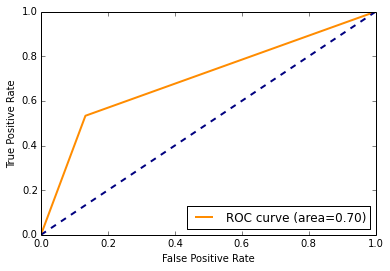

In [14]:
draw_roc(dataset,gnb,.2)

In [16]:
testset=pd.read_table('data/breast_cancer_test.tsv',sep='\t')
test_result=external_val_classif(testset,dataset,gnb)

accuracy : 0.625
precision :0.9
recall : 0.257142857143
f1_score : 0.4
